<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n20.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.762688,43.066782,20.150000,0.002115,135.981585,135.978342,0.003243
1,0.0,1.0,35.765432,22.404491,40.158448,-0.011353,108.317018,108.327266,-0.010248
2,0.0,2.0,65.122380,58.985007,38.928637,0.000525,173.036550,173.035380,0.001170
3,0.0,3.0,70.074364,61.606227,93.283274,0.000858,234.964723,234.963624,0.001099
4,0.0,4.0,61.669394,23.878328,76.505022,-0.011656,172.041087,172.051604,-0.010517
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.423010,25.825968,67.946176,-0.001714,183.193441,183.195798,-0.002357
249996,999.0,246.0,76.861047,72.147400,46.292365,0.000688,205.301500,205.300989,0.000511
249997,999.0,247.0,57.867627,38.861232,73.226152,0.001301,179.956312,179.955540,0.000772
249998,999.0,248.0,33.033116,75.553083,32.703370,0.000058,151.289627,151.290476,-0.000849


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.762688,43.066782,20.150000,0.002115,135.981585,135.978342,0.003243
1,0.0,1.0,35.765432,22.404491,40.158448,-0.011353,108.317018,108.327266,-0.010248
2,0.0,2.0,65.122380,58.985007,38.928637,0.000525,173.036550,173.035380,0.001170
3,0.0,3.0,70.074364,61.606227,93.283274,0.000858,234.964723,234.963624,0.001099
4,0.0,4.0,61.669394,23.878328,76.505022,-0.011656,172.041087,172.051604,-0.010517
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.423010,25.825968,67.946176,-0.001714,183.193441,183.195798,-0.002357
249996,999.0,246.0,76.861047,72.147400,46.292365,0.000688,205.301500,205.300989,0.000511
249997,999.0,247.0,57.867627,38.861232,73.226152,0.001301,179.956312,179.955540,0.000772
249998,999.0,248.0,33.033116,75.553083,32.703370,0.000058,151.289627,151.290476,-0.000849


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.762688,43.066782,20.150000,0.002115,135.981585,135.978342,0.003243
1,0.0,1.0,35.765432,22.404491,40.158448,-0.011353,108.317018,108.327266,-0.010248
2,0.0,2.0,65.122380,58.985007,38.928637,0.000525,173.036550,173.035380,0.001170
3,0.0,3.0,70.074364,61.606227,93.283274,0.000858,234.964723,234.963624,0.001099
4,0.0,4.0,61.669394,23.878328,76.505022,-0.011656,172.041087,172.051604,-0.010517
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.423010,25.825968,67.946176,-0.001714,183.193441,183.195798,-0.002357
249996,999.0,246.0,76.861047,72.147400,46.292365,0.000688,205.301500,205.300989,0.000511
249997,999.0,247.0,57.867627,38.861232,73.226152,0.001301,179.956312,179.955540,0.000772
249998,999.0,248.0,33.033116,75.553083,32.703370,0.000058,151.289627,151.290476,-0.000849


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

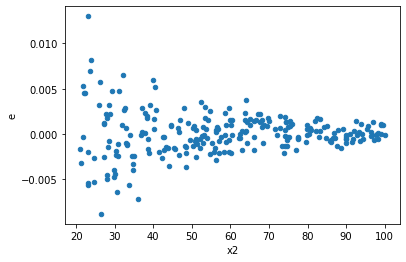

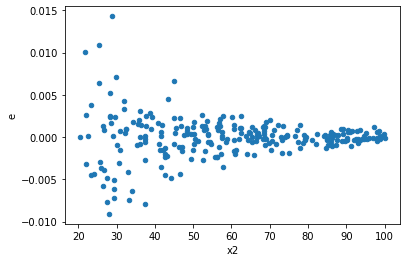

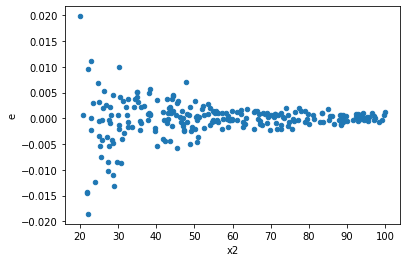

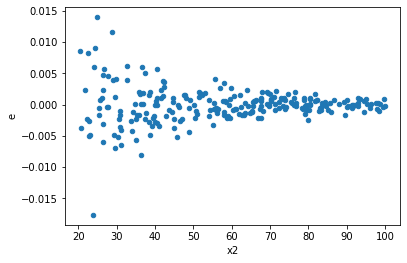

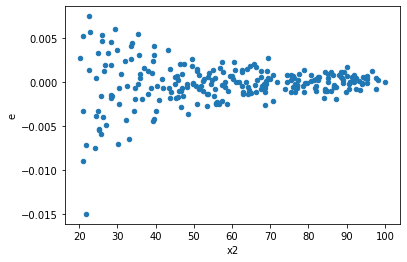

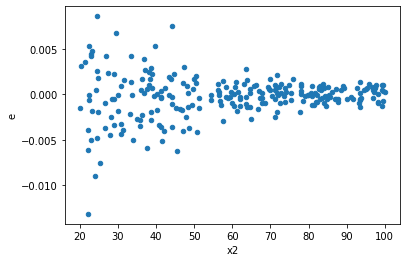

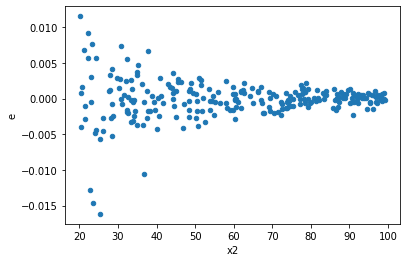

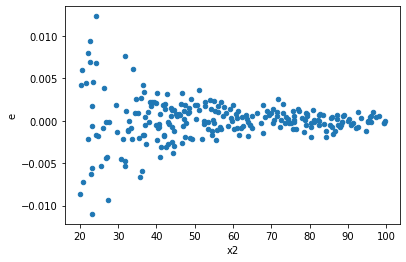

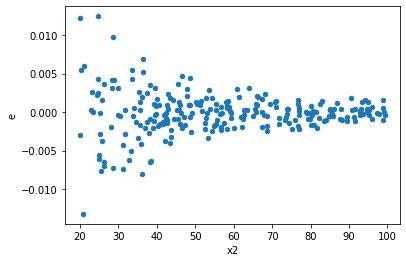

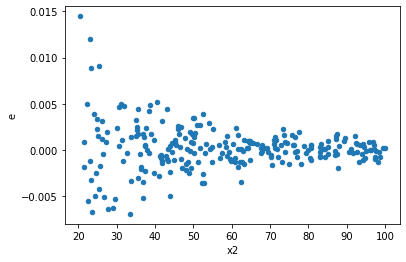

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,7.188401643293347e-05,0.0018175919032313045,7.487918378430569e-07,1.8933248991992755e-05,0.03954904085187576,2.93829700448223e-42,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,8.439602390337923e-05,0.0013956350400262947,8.791252489935336e-07,1.4537865000273903e-05,0.06047141371700524,3.8951174907486936e-34,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6.791851681924049e-05,0.0013141035691556157,7.074845502004217e-07,1.3688578845370997e-05,0.051684295221024246,4.229445547314872e-37,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,5.692900654170616e-05,0.0011234614946271564,5.930104848094392e-07,1.1702723902366212e-05,0.05067285956302331,1.776943262092118e-37,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5.142668065533106e-05,0.0012711617766280132,5.356945901596985e-07,1.3241268506541805e-05,0.040456440400331764,8.126795184168079e-42,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6.698496305723951e-05,0.0013904031416092102,6.97760031846245e-07,1.4483366058429273e-05,0.048176648234348175,1.9218699119006563e-38,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,9.184958395598732e-05,0.001351640154196597,9.567664995415346e-07,1.4079584939547886e-05,0.06795416936291146,5.727632896332115e-32,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,5.8409607681804686e-05,0.0014282300541665401,6.084334133521322e-07,1.4877396397568126e-05,0.04089649808965144,1.319333560512974e-41,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5.54393835882679e-05,0.0019475139152892367,5.774935790444573e-07,2.0286603284262883e-05,0.02846674581014959,9.648931422303978e-49,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64